In [2]:
import pandas as pd # Data manipulation and analysis library work with structure data'Excel' 
import numpy as np# numeric library 
from sklearn.impute import SimpleImputer# work with ML that handling missing data by replacing 
import seaborn as sns # anthor library for virtualization that use with matplot to make a beuty
import matplotlib.pyplot as plt# virtualization library 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn") # to remove any warning
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Read Data

In [4]:
data = pd.read_csv("Student Depression Dataset.csv")


# EDA
### Exploratory Data Analysis

In [6]:
data.shape

(27901, 18)

In [7]:
data.head()

id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

In [8]:
data.describe()

id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min        0.000000            0.000000          0.000000          0.000000   
25%        6.290000            2.000000          0.000000          4.000000   
50%        7.770000            3.000000          0.000000          8.000000   
75%        8.920000            4.000000          0.000000         10.000000   
max       10.000000            5.000000          4.000000         12.000000   

       Financial Stress    Depression  
count      27898.000000  27901.000000  
mean           3.139867      0.585499  
std            1.437347      0.492645  
min            1.000000      0.000000  
25%            2.000000      0.000000  
50%            3.000000      1.000000  
75%            4.000000      1.000000  
max            5.000000      1.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [10]:
for i in data['Depression'].unique():
    print(i)

1
0


In [11]:
for i in data['Job Satisfaction'].unique():
    print(i)

0.0
3.0
4.0
2.0
1.0


# Preprocessing

In [13]:
data.drop('id',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

### Missing value 

In [15]:
# Check for missing values
missing_values = data.isnull().sum()
missing_summary = missing_values[missing_values > 0]
missing_summary

Financial Stress    3
dtype: int64

<Axes: >

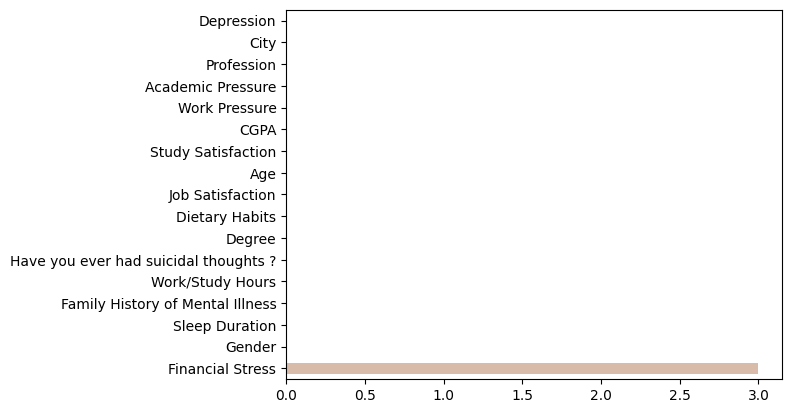

In [16]:
data.isnull().sum().sort_values(ascending=False).plot(kind='barh', color='#D9BBA9')


In [17]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

missing_percentage[missing_percentage > 0]

Financial Stress    0.010752
dtype: float64

In [18]:
data=data.dropna()

In [19]:
data.isnull().sum().sort_values(ascending=False)


Gender                                   0
Sleep Duration                           0
Family History of Mental Illness         0
Financial Stress                         0
Work/Study Hours                         0
Have you ever had suicidal thoughts ?    0
Degree                                   0
Dietary Habits                           0
Job Satisfaction                         0
Age                                      0
Study Satisfaction                       0
CGPA                                     0
Work Pressure                            0
Academic Pressure                        0
Profession                               0
City                                     0
Depression                               0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  object 
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  object 
 3   Profession                             27898 non-null  object 
 4   Academic Pressure                      27898 non-null  float64
 5   Work Pressure                          27898 non-null  float64
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27898 non-null  float64
 9   Sleep Duration                         27898 non-null  object 
 10  Dietary Habits                         27898 non-null  object 
 11  Degree 

### Duplicated Value

In [22]:
 # Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


### Handling outlier

In [24]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

outliers = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of outliers: {outliers[col].shape[0]}\n")


Column: Age
Lower Bound: 7.5, Upper Bound: 43.5
Number of outliers: 12

Column: Academic Pressure
Lower Bound: -1.0, Upper Bound: 7.0
Number of outliers: 0

Column: Work Pressure
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 3

Column: CGPA
Lower Bound: 2.345, Upper Bound: 12.865
Number of outliers: 9

Column: Study Satisfaction
Lower Bound: -1.0, Upper Bound: 7.0
Number of outliers: 0

Column: Job Satisfaction
Lower Bound: 0.0, Upper Bound: 0.0
Number of outliers: 8

Column: Work/Study Hours
Lower Bound: -5.0, Upper Bound: 19.0
Number of outliers: 0

Column: Financial Stress
Lower Bound: -1.0, Upper Bound: 7.0
Number of outliers: 0

Column: Depression
Lower Bound: -1.5, Upper Bound: 2.5
Number of outliers: 0



In [25]:
# Replace Age with lower or upper bounds
data.loc[:, 'Age'] = data['Age'].clip(lower=7.5, upper=43.5)

# Replace CGPA with lower or upper bounds
data.loc[:, 'CGPA'] = data['CGPA'].clip(lower=2.345, upper=12.865)


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  object 
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  object 
 3   Profession                             27898 non-null  object 
 4   Academic Pressure                      27898 non-null  float64
 5   Work Pressure                          27898 non-null  float64
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27898 non-null  float64
 9   Sleep Duration                         27898 non-null  object 
 10  Dietary Habits                         27898 non-null  object 
 11  Degree 

In [27]:
for i in data['Work Pressure'].unique():
    print(i)

0.0
5.0
2.0


In [28]:
# data.drop('Work Pressure',axis=1,inplace=True)
# Drop column safely using .loc
data = data.loc[:, data.columns != 'Work Pressure']


In [29]:
for i in data['Job Satisfaction'].unique():
    print(i)

0.0
3.0
4.0
2.0
1.0


In [30]:
# Drop column safely using .loc
data = data.loc[:, data.columns != 'Job Satisfaction']


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  object 
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  object 
 3   Profession                             27898 non-null  object 
 4   Academic Pressure                      27898 non-null  float64
 5   CGPA                                   27898 non-null  float64
 6   Study Satisfaction                     27898 non-null  float64
 7   Sleep Duration                         27898 non-null  object 
 8   Dietary Habits                         27898 non-null  object 
 9   Degree                                 27898 non-null  object 
 10  Have you ever had suicidal thoughts ?  27898 non-null  object 
 11  Work/St

In [32]:
data.to_csv('visualization.csv', index=False)


### Encoding

In [34]:
data.select_dtypes(include='object').nunique()

Gender                                    2
City                                     52
Profession                               14
Sleep Duration                            5
Dietary Habits                            4
Degree                                   28
Have you ever had suicidal thoughts ?     2
Family History of Mental Illness          2
dtype: int64

In [35]:
# Initialize the encoders
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

In [36]:
# Binary categorical features
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(data['Have you ever had suicidal thoughts ?'])
data['Family History of Mental Illness'] = label_encoder.fit_transform(data['Family History of Mental Illness'])

In [37]:
for i in data['Sleep Duration'] .unique():
    print(i)

5-6 hours
Less than 5 hours
7-8 hours
More than 8 hours
Others


In [38]:
for i in data['Dietary Habits'].unique():
    print(i)

Healthy
Moderate
Unhealthy
Others


In [39]:
for i in data['Degree'].unique():
    print(i)

B.Pharm
BSc
BA
BCA
M.Tech
PhD
Class 12
B.Ed
LLB
BE
M.Ed
MSc
BHM
M.Pharm
MCA
MA
B.Com
MD
MBA
MBBS
M.Com
B.Arch
LLM
B.Tech
BBA
ME
MHM
Others


In [40]:
ordinal_encoder = OrdinalEncoder(categories=[['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours', 'Others']])
data['Sleep Duration'] = ordinal_encoder.fit_transform(data[['Sleep Duration']])
ordinal_encoder = OrdinalEncoder(categories=[['Unhealthy', 'Moderate', 'Healthy', 'Others']])
data['Dietary Habits'] = ordinal_encoder.fit_transform(data[['Dietary Habits']])


In [41]:
data['Degree'] = label_encoder.fit_transform(data['Degree'])

In [42]:
data['Profession'] = label_encoder.fit_transform(data['Profession'])
data['City'] = label_encoder.fit_transform(data['City'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  int32  
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  int32  
 3   Profession                             27898 non-null  int32  
 4   Academic Pressure                      27898 non-null  float64
 5   CGPA                                   27898 non-null  float64
 6   Study Satisfaction                     27898 non-null  float64
 7   Sleep Duration                         27898 non-null  float64
 8   Dietary Habits                         27898 non-null  float64
 9   Degree                                 27898 non-null  int32  
 10  Have you ever had suicidal thoughts ?  27898 non-null  int32  
 11  Work/St

In [44]:
data.to_csv('processed_data.csv', index=False)

In [45]:
data

Gender   Age  City  Profession  Academic Pressure  CGPA  \
0           1  33.0    51          11                5.0  8.97   
1           0  24.0     3          11                2.0  5.90   
2           1  31.0    44          11                3.0  7.03   
3           0  28.0    49          11                3.0  5.59   
4           0  25.0    16          11                4.0  8.13   
...       ...   ...   ...         ...                ...   ...   
27896       0  27.0    45          11                5.0  5.75   
27897       1  27.0    25          11                2.0  9.40   
27898       1  31.0     9          11                3.0  6.61   
27899       0  18.0    25          11                5.0  6.88   
27900       1  27.0    38          11                4.0  9.24   

       Study Satisfaction  Sleep Duration  Dietary Habits  Degree  \
0                     2.0             1.0             2.0       3   
1                     5.0             1.0             1.0      10   
2                     5.0             0.0             2.0       5   
3                     2.0             2.0             1.0       7   
4                     3.0             1.0             1.0      17   
...                   ...             ...             ...     ...   
27896                 5.0             1.0             0.0      11   
27897                 3.0             0.0             2.0      25   
27898                 4.0             1.0             0.0      22   
27899                 2.0             0.0             2.0      11   
27900                 1.0             0.0             2.0       7   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                          1               3.0   
1                                          0               3.0   
2                                          0               9.0   
3                                          1               4.0   
4                                          1               1.0   
...                                      ...               ...   
27896                                      1               7.0   
27897                                      0               0.0   
27898                                      0              12.0   
27899                                      1              10.0   
27900                                      1               2.0   

       Financial Stress  Family History of Mental Illness  Depression  
0                   1.0                                 0           1  
1                   2.0                                 1           0  
2                   1.0                                 1           0  
3                   5.0                                 1           1  
4                   1.0                                 0           0  
...                 ...                               ...         ...  
27896               1.0                                 1           0  
27897               3.0                                 1           0  
27898               2.0                                 0           0  
27899               5.0                                 0           1  
27900               3.0                                 1           1  

[27898 rows x 15 columns]

In [46]:
min_values = data.min()
max_values = data.max()

# Print the min and max values for each column
print("Min values for each column:")
print(min_values)

print("\nMax values for each column:")
print(max_values)

Min values for each column:
Gender                                    0.000
Age                                      18.000
City                                      0.000
Profession                                0.000
Academic Pressure                         0.000
CGPA                                      2.345
Study Satisfaction                        0.000
Sleep Duration                            0.000
Dietary Habits                            0.000
Degree                                    0.000
Have you ever had suicidal thoughts ?     0.000
Work/Study Hours                          0.000
Financial Stress                          1.000
Family History of Mental Illness          0.000
Depression                                0.000
dtype: float64

Max values for each column:
Gender                                    1.0
Age                                      43.5
City                                     51.0
Profession                               13.0
Academic Pressure       

In [47]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example: Assuming your dataset 'data' is already loaded as a pandas DataFrame
# data = pd.read_csv('your_dataset.csv')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the numeric columns for scaling
numeric_columns = ['Age', 'City', 'Profession', 'Academic Pressure', 'CGPA', 
                   'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 
                   'Degree', 'Work/Study Hours', 'Financial Stress', 
                   'Family History of Mental Illness', 'Depression']

# Apply scaling to the selected columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Check the scaled data
data


Gender       Age      City  Profession  Academic Pressure      CGPA  \
0           1  0.588235  1.000000    0.846154                1.0  0.865447   
1           0  0.235294  0.058824    0.846154                0.4  0.464402   
2           1  0.509804  0.862745    0.846154                0.6  0.612018   
3           0  0.392157  0.960784    0.846154                0.6  0.423906   
4           0  0.274510  0.313725    0.846154                0.8  0.755715   
...       ...       ...       ...         ...                ...       ...   
27896       0  0.352941  0.882353    0.846154                1.0  0.444807   
27897       1  0.352941  0.490196    0.846154                0.4  0.921620   
27898       1  0.509804  0.176471    0.846154                0.6  0.557152   
27899       0  0.000000  0.490196    0.846154                1.0  0.592423   
27900       1  0.352941  0.745098    0.846154                0.8  0.900718   

       Study Satisfaction  Sleep Duration  Dietary Habits    Degree  \
0                     0.4            0.25        0.666667  0.111111   
1                     1.0            0.25        0.333333  0.370370   
2                     1.0            0.00        0.666667  0.185185   
3                     0.4            0.50        0.333333  0.259259   
4                     0.6            0.25        0.333333  0.629630   
...                   ...             ...             ...       ...   
27896                 1.0            0.25        0.000000  0.407407   
27897                 0.6            0.00        0.666667  0.925926   
27898                 0.8            0.25        0.000000  0.814815   
27899                 0.4            0.00        0.666667  0.407407   
27900                 0.2            0.00        0.666667  0.259259   

       Have you ever had suicidal thoughts ?  Work/Study Hours  \
0                                          1          0.250000   
1                                          0          0.250000   
2                                          0          0.750000   
3                                          1          0.333333   
4                                          1          0.083333   
...                                      ...               ...   
27896                                      1          0.583333   
27897                                      0          0.000000   
27898                                      0          1.000000   
27899                                      1          0.833333   
27900                                      1          0.166667   

       Financial Stress  Family History of Mental Illness  Depression  
0                  0.00                               0.0         1.0  
1                  0.25                               1.0         0.0  
2                  0.00                               1.0         0.0  
3                  1.00                               1.0         1.0  
4                  0.00                               0.0         0.0  
...                 ...                               ...         ...  
27896              0.00                               1.0         0.0  
27897              0.50                               1.0         0.0  
27898              0.25                               0.0         0.0  
27899              1.00                               0.0         1.0  
27900              0.50                               1.0         1.0  

[27898 rows x 15 columns]

In [48]:
data.to_csv('processed_data_after_scalling.csv', index=False)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_29848\3453927922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette=custom_palette)
C:\Users\LOQ\AppData\Local\Temp\ipykernel_29848\3453927922.py:9: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=correlations.values, y=correlations.index, palette=custom_palette)


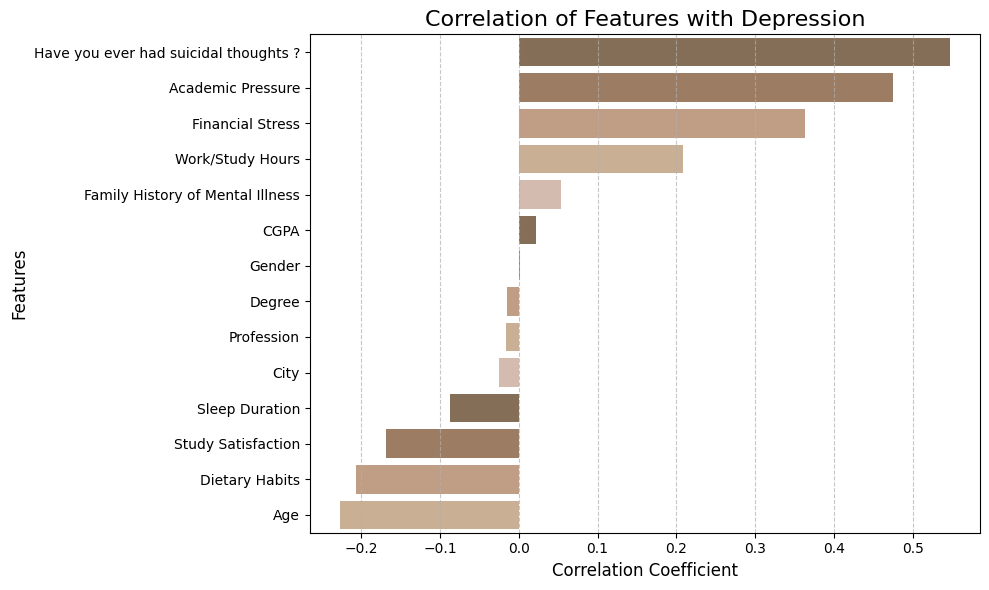

In [49]:
correlations = data.corr()['Depression'].drop('Depression')  # Exclude self-correlation
custom_palette = ['#8B6E4F', '#A67B5B', '#C89D7C', '#D2B08C', '#D9BBA9']

# Sort correlations for better visualization
correlations = correlations.sort_values(ascending=False)

# Bar chart for correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette=custom_palette)
plt.title('Correlation of Features with Depression', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
correlations

Have you ever had suicidal thoughts ?    0.546290
Academic Pressure                        0.474793
Financial Stress                         0.363591
Work/Study Hours                         0.208627
Family History of Mental Illness         0.053554
CGPA                                     0.022171
Gender                                   0.001819
Degree                                  -0.015011
Profession                              -0.016437
City                                    -0.024878
Sleep Duration                          -0.087229
Study Satisfaction                      -0.168010
Dietary Habits                          -0.206218
Age                                     -0.226533
Name: Depression, dtype: float64

In [51]:
selected_features = correlations[correlations.abs() > 0.2].index.tolist()
selected_features

['Have you ever had suicidal thoughts ?',
 'Academic Pressure',
 'Financial Stress',
 'Work/Study Hours',
 'Dietary Habits',
 'Age']

In [52]:
selected_features = [
    "Have you ever had suicidal thoughts ?",
    "Academic Pressure",
    "Financial Stress",
    "Work/Study Hours",
    "Dietary Habits",
    "Age",
    "Depression"
] 
selected_data = data[selected_features]
 
selected_data.to_csv("selected_features.csv", index=False)